<a href="https://colab.research.google.com/github/tucker-anderson/Facial-Keynotes/blob/master/Copy_of_Facial_Keypoints_Notebook_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# W207 Final Project: Facial Keypoints Detection

Section 6; Summer 2019

**Team Members:**
- Tucker Anderson
- Bruno Todescan
- Madia Taher

In [0]:
# First setup environment
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import csv

from tensorflow import keras as keras
import tensorflow as tf


from sklearn.model_selection import train_test_split

%matplotlib inline

In [0]:
# Colab setup:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [0]:
# Define constants:
IMAGE_WIDTH = 96
IMAGE_HEIGHT = 96

# Exploratory Data Analysis
Let's take a quick look at the data to understand a little about formatting, ranges, relationships, etc. 

In [0]:
#lookid_data = pd.read_csv("./drive/My Drive/W207_Appld_ML/IdLookupTable.csv")
lookid_data = pd.read_csv("IdLookupTable.csv")
lookid_data.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN


In [0]:
# Take a quick look at the submission data
# samplesubmission = pd.read_csv("./drive/My Drive/W207_Appld_ML/SampleSubmission.csv")
samplesubmission = pd.read_csv("SampleSubmission.csv")
samplesubmission.head()

,RowId,Location
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [0]:
# Take a quick look at the training data
#test_data_df = pd.read_csv("./drive/My Drive/W207_Appld_ML/test.csv")
test_data_df = pd.read_csv("test.csv")
test_data_df.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [0]:
# Take a quick look at the training data:
#train_data = pd.read_csv("./drive/My Drive/W207_Appld_ML/training.csv")
train_data = pd.read_csv("training.csv")
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


In [0]:
train_data.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [0]:
len(train_data)

7049

In [0]:
print(train_data.count())# prints the number of values for each column
print(len(train_data))
df = train_data.dropna()  # drop all rows that have missing values in them
len(df)

left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mouth_center_b

2140

# TODO: clean this up if removing NaNs

There are clearly lots of missing values in the example data set. This is ok though, since we don't need (or even want) a "perfect" data set for our model, since this can cause over fitting. Additionally, if we would to restrict our training data set to only the images with all valid number results, we would end up reducing our training set by almost 2/3, which could also lead to poor generalization.

## Training Data

Let's take a deeper look at our training data, since this is what we will be mostly focused on.

In [0]:
# Check for duplicates
# Remove Image column
td_remove_image=train_data.drop(['Image'], axis=1)
td_remove_image.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [0]:
duplicate_imgs = td_remove_image[td_remove_image.duplicated()]
len(duplicate_imgs)

0

So we don't have any *exact* duplicates in the data set, which although good to know, would not have affected our results tremendously.

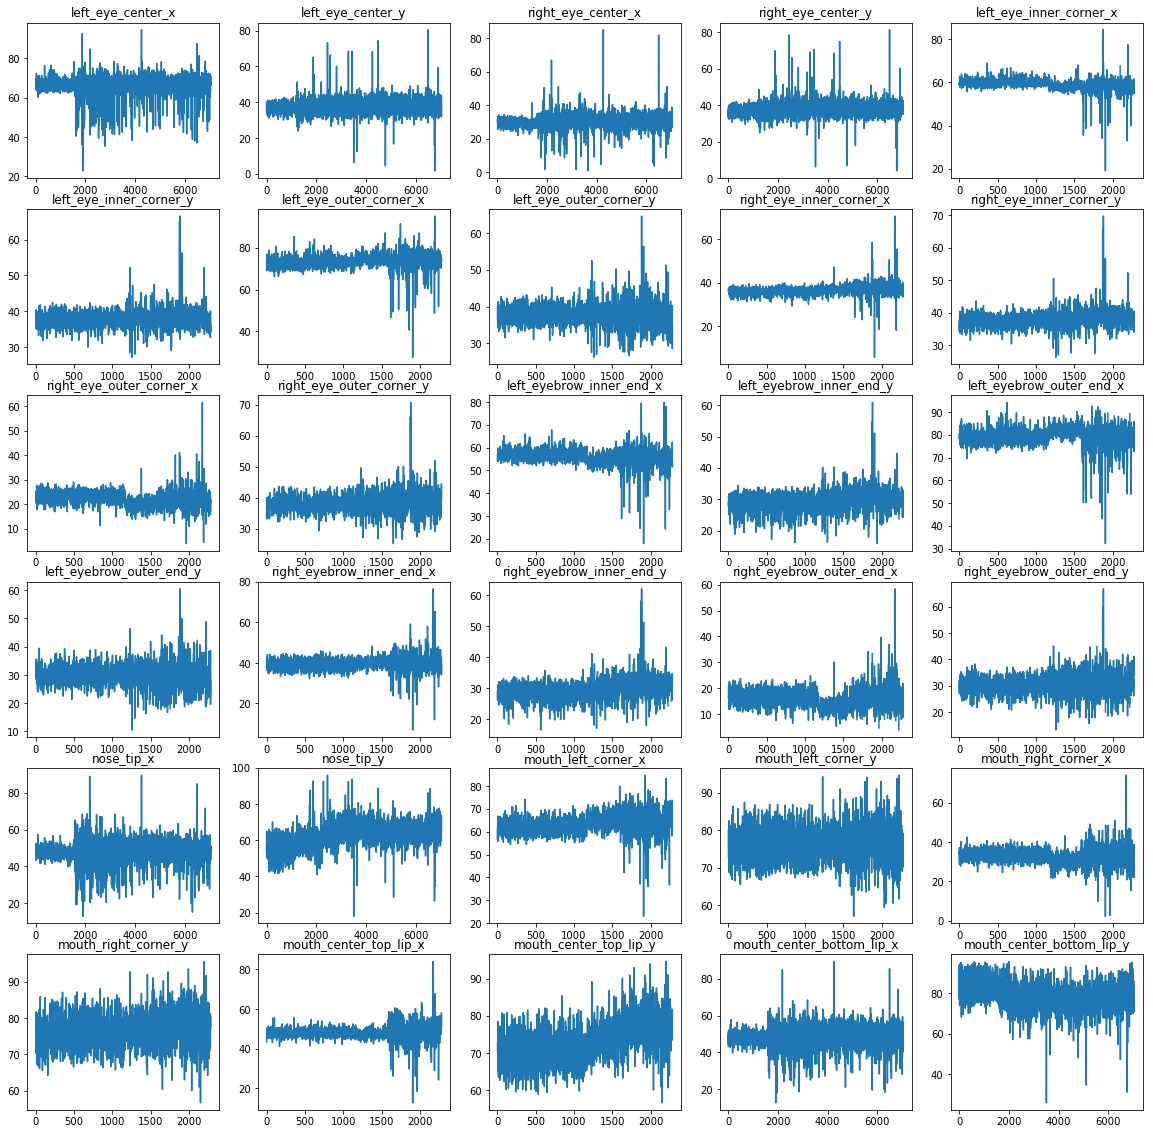

In [0]:
# Let's take a look at what the values look like. We use a line plot here and use histograms to below.
column_list=list(train_data.columns.values)
fig, ax = plt.subplots(figsize=(20,20),nrows=6, ncols=5)

i=0
for row in ax:
    for col in row:
        col.plot(train_data[column_list[i]])
        col.set_title(column_list[i])
        i=i+1

plt.show()

a = train_data.iloc[:,0].copy()

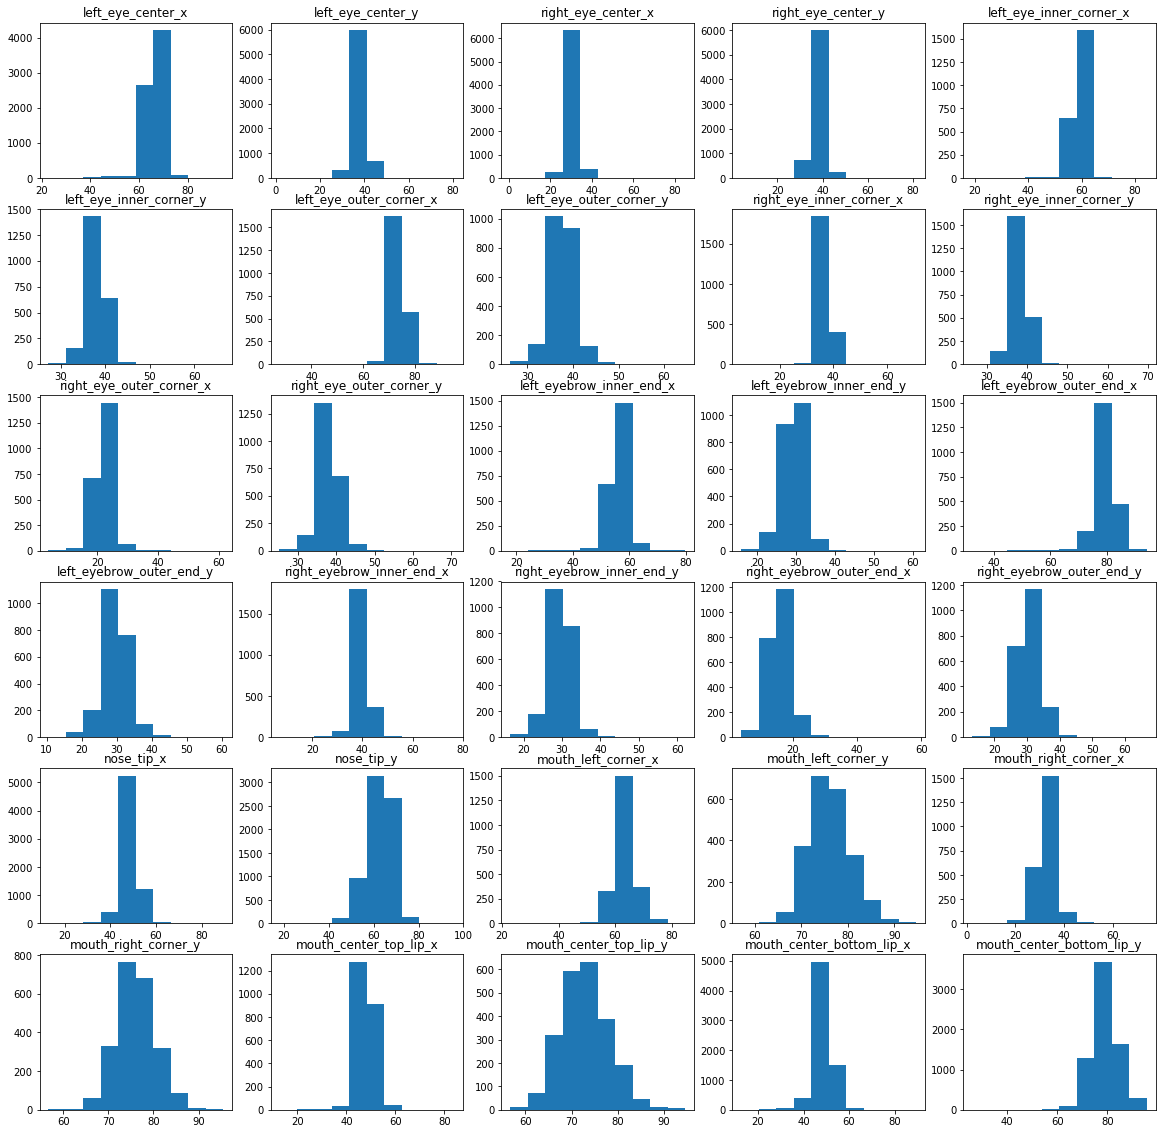

In [0]:
# What do the distributions look like (in 1-D)?
column_list=list(train_data.columns.values)
fig, ax = plt.subplots(figsize=(20,20),nrows=6, ncols=5)

i=0
for row in ax:
    for col in row:
        col.hist(train_data[column_list[i]].dropna())
        col.set_title(column_list[i])
        i=i+1

plt.show()

So from the above two cell results (line plots and histograms) we can see that the values are generally pretty tightly grouped around the same values.

## 2-D EDA

This only tells us half the story - since we are looking at coordinates in two dimensions, we take a look at what the feature vlaue ranges look like together, as X and Y pairs.

Before we can do this, we create some helper funcitons to split our trianing data set into the 'train' and 'test' components (image data and results data) and show the images when passed image data.

### Helper Functions

In [0]:
# this function will take a data frame as an input and spit out two numpy arrays as a result:
# one ('labels') for the labels only (columns 0 to 29) for each of the features we are predicting, and
# another ('data') for the image pixel data corresponding to a 9216-long array of integer values between 0 and 255.
def trainDataLabelSplit(df):
    # assuming a dataframe input
    
    # create a DF of just the labels
    labels = np.array(df.iloc[:,:30])
    length = len(df)
#     length = 2

    data = np.empty(shape=(length,96,96,1))
    
    start = time.time()
    for i in range(length):
        data[i] = np.array(df.iloc[i,30].split()).reshape(96,96,1)
        if i % 500 == 0:
            print('%d: %.5f seconds elapsed.'%(i,time.time()-start))
    
    return labels, data.astype('int16')

In [0]:
start = time.time()
Ytrain, Xtrain = trainDataLabelSplit(train_data)
end = time.time()
print('Total %9.5f seconds.' %(end-start))

0: 0.00399 seconds elapsed.
500: 2.31496 seconds elapsed.
1000: 4.61196 seconds elapsed.
1500: 7.15396 seconds elapsed.
2000: 9.41499 seconds elapsed.
2500: 11.72200 seconds elapsed.
3000: 13.90599 seconds elapsed.
3500: 16.08596 seconds elapsed.
4000: 18.29302 seconds elapsed.
4500: 20.48396 seconds elapsed.
5000: 22.67996 seconds elapsed.
5500: 24.89996 seconds elapsed.
6000: 27.13996 seconds elapsed.
6500: 29.38699 seconds elapsed.
7000: 31.56496 seconds elapsed.
Total  31.94500 seconds.


In [0]:
# Take a dataframe as input expecting it to have been read from the test.csv input file.
# Reshape this data and return it as an numpy array.
def load_test_set(df):
    length = len(df)

    data = np.empty(shape=(length,96,96,1))
    
    start = time.time()
    for i in range(length):
        data[i] = np.array(df.iloc[i,1].split()).reshape(96,96,1)
        if i % 500 == 0:
            print('%d: %.5f seconds elapsed.'%(i,time.time()-start))
    
    return data.astype('int16')

In [0]:
start = time.time()
test_data = load_test_set(test_data_df)
end = time.time()
print('Total %9.5f seconds.' %(end-start))

0: 0.00900 seconds elapsed.
500: 2.25300 seconds elapsed.
1000: 4.50900 seconds elapsed.
1500: 6.68800 seconds elapsed.
Total   7.93900 seconds.


In [0]:
# This function takes as an input the image data and an array of labels in the 
# form of [x0, y0, x1, y1, ...] coordinates and overlays the label points on the image.
def show_image_labels(img, labels):
    for i in range(0, len(labels), 2):
        if labels[i+1] >= 0 and labels[i+1] <=255 and labels[i] >= 0 and labels[i] <= 255:
            img[int(labels[i+1]),int(labels[i]),:] = 255
    plt.imshow(img[:,:,0], cmap='viridis')

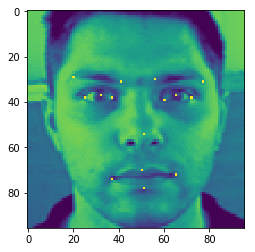

In [0]:
n = 3
show_image_labels(Xtrain[n], Ytrain[n])

Now we're ready to take a closer look at some of the data.

## Missing Values
What do these missing values mean for our data set? Can we intuitively understand what is going on with these values?

In [0]:
nas = train_data.isna()
nas.sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [0]:
na_rows_inds = nas.any(axis=1)
na_rows = train_data[na_rows_inds]
na_rows.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
210,65.365120,39.988480,28.251520,37.399680,59.322880,40.851840,71.982080,41.715200,33.717760,38.550400,...,61.278720,57.884800,87.459200,34.293120,85.157760,46.376960,79.116160,NaN,NaN,181 56 47 59 65 71 86 66 32 22 17 7 8 12 13 14...
350,67.258311,37.229867,26.980267,36.270862,60.225422,37.549511,74.291200,37.549511,34.333156,36.590507,...,62.163911,57.028978,86.778311,36.251022,87.097600,45.201778,79.106133,NaN,NaN,59 41 36 32 32 31 33 41 55 72 79 70 64 50 52 6...
499,65.783008,41.160992,29.971041,37.969983,60.464132,41.160992,71.455736,42.224926,35.289917,39.388562,...,58.180760,56.918479,85.482843,28.197818,81.937190,45.926876,75.554380,NaN,NaN,118 127 122 109 129 154 158 148 147 152 136 13...
512,68.286689,38.490807,31.361311,38.490807,61.604459,39.194125,74.264656,38.842466,35.933115,38.490807,...,59.590820,64.770098,82.800787,33.823475,82.449049,48.241574,71.547541,NaN,NaN,194 194 194 191 194 191 191 183 166 151 126 86...
810,72.376354,37.281897,24.536920,35.003894,64.187469,37.314945,79.589947,39.180234,33.269522,36.142896,...,57.784269,65.161912,83.222655,28.713345,82.463150,47.420602,77.785827,NaN,NaN,124 124 126 128 131 134 136 141 141 139 138 14...


In [0]:
na_label, na_train = trainDataLabelSplit(na_rows)

0: 0.01200 seconds elapsed.
500: 2.50300 seconds elapsed.
1000: 4.78200 seconds elapsed.
1500: 6.95000 seconds elapsed.
2000: 9.09300 seconds elapsed.
2500: 11.23400 seconds elapsed.
3000: 13.34900 seconds elapsed.
3500: 15.54800 seconds elapsed.
4000: 17.70300 seconds elapsed.
4500: 19.86100 seconds elapsed.


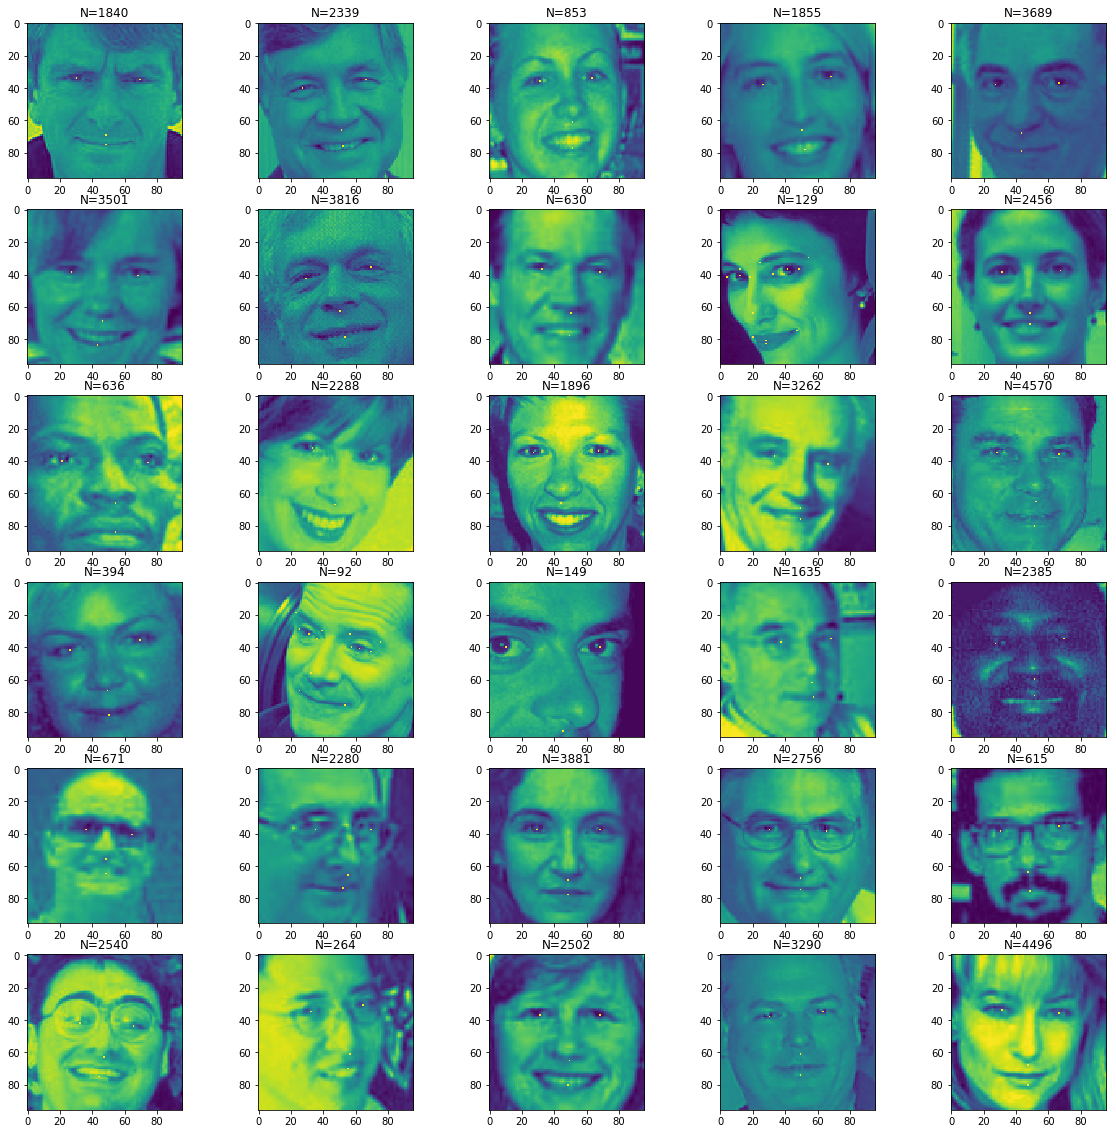

In [0]:
rows = 6
cols = 5

inds = np.random.choice(a=len(na_train), size=rows*cols, replace=False)
plt.subplots(figsize=(20,20),nrows=rows, ncols=cols)

for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.title(('N='+str(inds[i])))
    show_image_labels(na_train[inds[i]], na_label[inds[i]])

plt.show()



**Potentially interesting to look at:**
* distribution of the pixel values in 2D (where do we see concentrations?)
* distribution of the feature values in 2D

### Pixel Value Distributions
To get an idea about our data set, we can see what the densities are like for the image set. This can be accomplished by summing all the pixel values and plotting these. The imshow() command will automatically scale these representing a density plot.

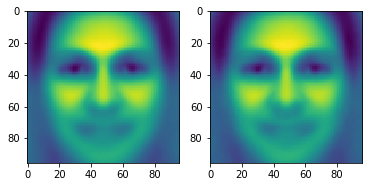

In [0]:
# To look at image densities, we "overlay" them by summing all the values at each pixel. 
# Higher values will show higher densities overall.

pixel_sums_train = np.zeros((96,96))
pixel_sums_test = np.zeros((96,96))

for r in range(96):
    for c in range(96):
        pixel_sums_train[r,c] = np.sum(Xtrain[:,r,c,0]/255)
        pixel_sums_test[r,c] = np.sum(test_data[:,r,c,0]/255)

plt.subplot(1,2,1)
plt.imshow(pixel_sums_train, cmap='viridis')
plt.subplot(1,2,2)
plt.imshow(pixel_sums_test, cmap='viridis')

This plot shows a few interesting points. The forehead, eyes, nose and cheeks are quite distinct, meaning that the majority of our images are centered in approximately the same location. The blurring above the lips and around the mouth area is likely due to mustaches, smiles vs frowns, etc. We can also see that our training and test sets generated similar images, so we should expect our model to perform relatively well to the test data set, though generalizability is something we'll need to look out for.

Based on this, one could assume that the a model may be more accurate with predictions of where the eyes and nose are, while having poorer accuracy with the mouth and potentially the ends of the eyebrows.

### Facial Keypoints Distributions

To take a deeper look at our dataset, we investigate where we our keypoints generally lie. This will help to identify any outlier images, and reinfornce the observations made in the previous step with the heatmaps.

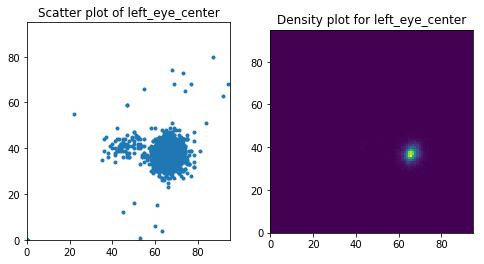

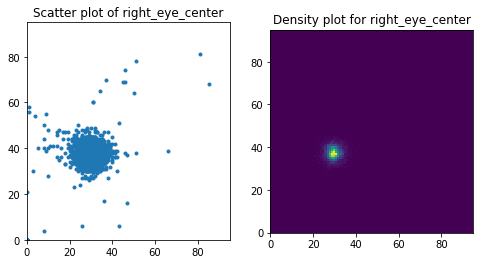

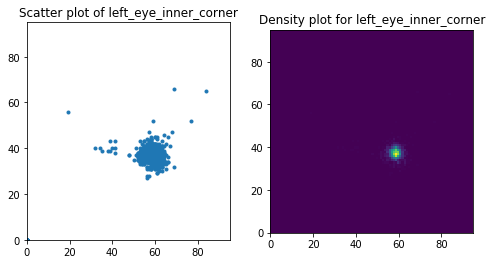

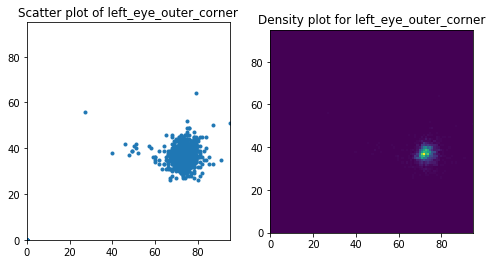

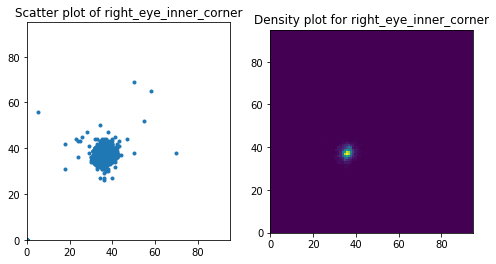

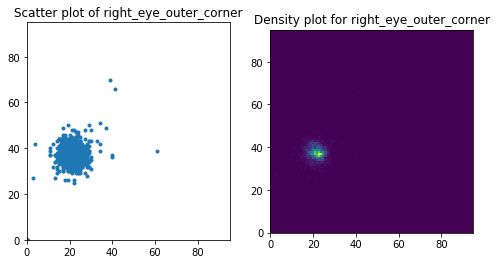

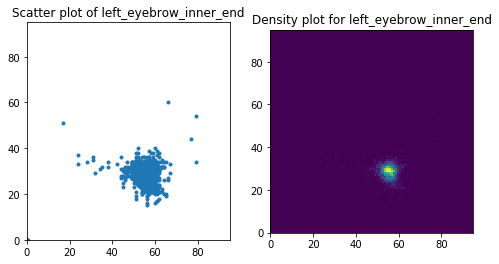

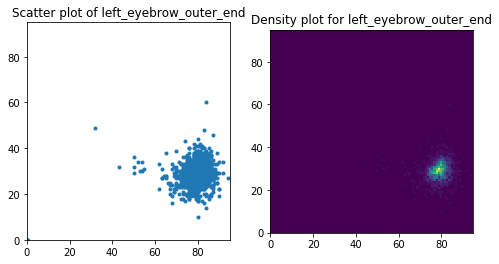

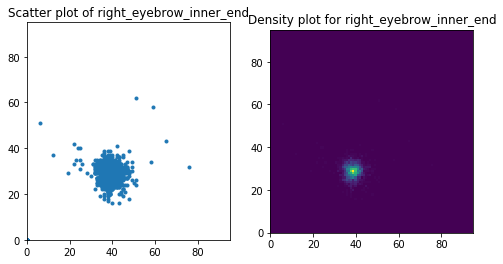

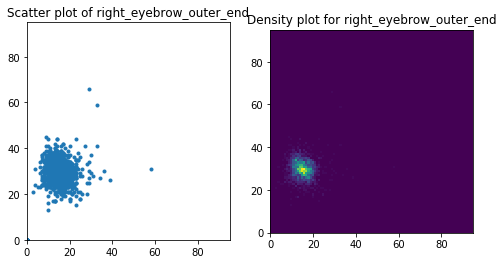

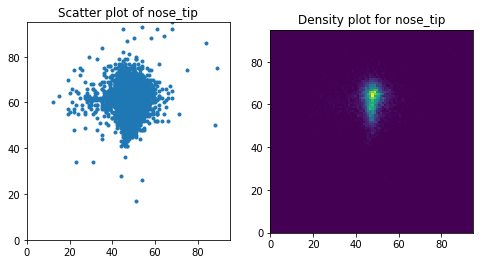

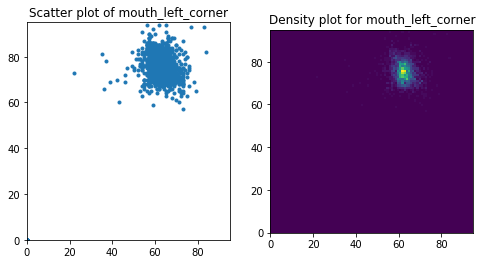

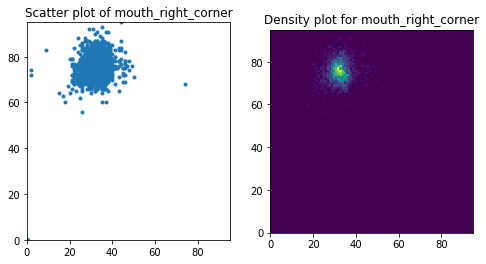

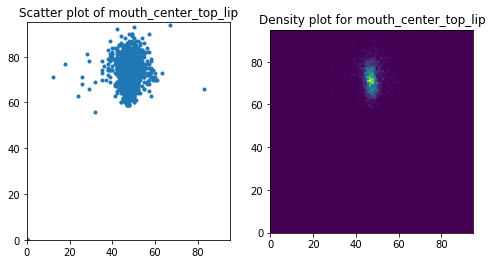

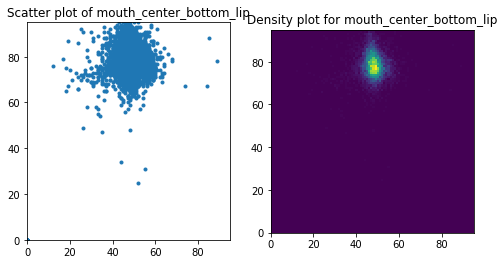

In [0]:
IMG_H = IMG_W = 96

def get_feature_density(feature_ind, label_array):
    feature_density = np.zeros((IMG_H, IMG_W))
    for i in range(len(label_array)):
        c = Ytrain[i,feature_ind]
        r = Ytrain[i,feature_ind+1]
        if ~np.isnan(r) and ~np.isnan(c):
            feature_density[int(r),int(c)] += 1
    return feature_density


column_list=list(train_data.columns.values)
for i in range(0,30,2):
    # Scatter plot of ALL values for each feature (in X and Y)
    plt.figure(figsize=(8,4))
    ax1 = plt.subplot(1,2,1)
    ax1.scatter(x=Ytrain[:,i].astype('int8'), y=Ytrain[:,i+1].astype('int8'), marker='.')
    ax1.set_xlim(0,IMG_W-1)
    ax1.set_ylim(0,IMG_H-1)
    ax1.set_title(('Scatter plot of '+column_list[i][:-2]))

    # View the same data as a density plot:
    ax2 = plt.subplot(1,2,2)
    ax2.imshow(get_feature_density(i,Ytrain), cmap='viridis')
    ax2.set_xlim(0,IMG_W-1)
    ax2.set_ylim(0,IMG_H-1)
    ax2.set_title(('Density plot for '+column_list[i][:-2]))

    plt.show()

We can see that although the features take on a variety of values, they are mostly clustered around a smaller set of points (with few outliers). This aligns with the findings above where we saw the "average" image for our data set.

# Training a Baseline Neural Net Model

Although we have been looking at the complete data set (including training exmaples where some features do not exist), for the purposes of training a model we need to clean out the NaNs and null values.

Let's try codifying the null values to -1 to see how the model handles fitting these.

In [0]:
train2 = train_data.copy()

In [0]:
train2.fillna(value=-1)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
5,69.680748,39.968748,29.183551,37.563364,62.864299,40.169271,76.898243,41.171888,36.401047,39.367626,...,58.800000,64.869084,82.471178,31.990430,81.669084,49.308112,78.487626,49.432374,93.898766,167 169 170 167 156 145 106 68 52 24 20 15 21 ...
6,64.131866,34.290040,29.578953,33.138040,57.797154,35.154040,69.026577,34.290040,34.761664,33.714040,...,53.006174,55.781799,70.570953,33.898309,70.282953,45.127732,65.099597,45.415732,78.057020,109 109 125 141 145 139 120 81 45 34 31 35 36 ...
7,67.468893,39.413452,29.355961,39.621717,59.554951,40.454773,75.591612,40.038245,37.478214,40.454773,...,56.907961,66.843961,80.025786,30.189204,81.275184,48.100194,71.278602,48.516816,91.063922,178 177 178 179 179 179 181 185 188 184 192 20...
8,65.802880,34.755200,27.475840,36.185600,58.652160,37.329280,72.952960,35.899520,36.342400,37.043200,...,55.348480,65.516800,73.368320,31.194240,74.798080,49.213440,67.648000,49.499520,83.093120,164 158 118 76 66 69 59 53 43 31 35 41 45 55 6...
9,64.121231,36.740308,29.468923,38.390154,58.620923,37.840615,71.272000,37.290338,36.344615,39.490462,...,54.341538,65.771692,69.192615,32.769231,72.217846,49.270154,67.542769,49.545231,76.893538,226 227 225 224 221 220 215 210 210 208 206 18...


In [0]:
Ytrain_m1, Xtrain_m1 = trainDataLabelSplit(train2)

0: 0.00500 seconds elapsed.
500: 2.26404 seconds elapsed.
1000: 4.49100 seconds elapsed.
1500: 6.70501 seconds elapsed.
2000: 9.41900 seconds elapsed.
2500: 12.25200 seconds elapsed.
3000: 14.87000 seconds elapsed.
3500: 17.14900 seconds elapsed.
4000: 19.63700 seconds elapsed.
4500: 22.02900 seconds elapsed.
5000: 24.38400 seconds elapsed.
5500: 26.85600 seconds elapsed.
6000: 29.09700 seconds elapsed.
6500: 31.31300 seconds elapsed.
7000: 33.52500 seconds elapsed.


Next, let's try training a model on this new data set.

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout, Input, Dense
from keras.models import Model

m = Sequential()
m.add(Flatten(input_shape = Xtrain_m1[1].shape))

m.add(Dense(128, activation = 'relu'))
m.add(Dense(64, activation = 'relu'))
m.add(Dense(30))

m.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'acc'])

In [0]:
m.fit(Xtrain_m1, Ytrain_m1, epochs = 10, batch_size=50)

Epoch 1/10
7049/7049 [==============================] - 2s 267us/step - loss: nan - mean_squared_error: nan - acc: 0.0074
Epoch 2/10
7049/7049 [==============================] - 1s 201us/step - loss: nan - mean_squared_error: nan - acc: 0.0074
Epoch 3/10
7049/7049 [==============================] - 1s 196us/step - loss: nan - mean_squared_error: nan - acc: 0.0074
Epoch 4/10
7049/7049 [==============================] - 1s 208us/step - loss: nan - mean_squared_error: nan - acc: 0.0074
Epoch 5/10
7049/7049 [==============================] - 1s 194us/step - loss: nan - mean_squared_error: nan - acc: 0.0074
Epoch 6/10
7049/7049 [==============================] - 1s 204us/step - loss: nan - mean_squared_error: nan - acc: 0.0074
Epoch 7/10
7049/7049 [==============================] - 1s 201us/step - loss: nan - mean_squared_error: nan - acc: 0.0074
Epoch 8/10
7049/7049 [==============================] - 1s 210us/step - loss: nan - mean_squared_error: nan - acc: 0.0074
Epoch 9/10
7049/7049 [==

These results aren't good. Let's try removing all the values with a blanket `.dropna()` and retraining the model.

In [0]:
Ytrain_clean, Xtrain_clean = trainDataLabelSplit(train_data.dropna())

0: 0.00900 seconds elapsed.
500: 2.18103 seconds elapsed.
1000: 4.33800 seconds elapsed.
1500: 6.58600 seconds elapsed.
2000: 8.90100 seconds elapsed.


In [0]:
m1_clean = Sequential()
m1_clean.add(Flatten(input_shape = Xtrain_m1[1].shape))

m1_clean.add(Dense(128, activation = 'relu'))
m1_clean.add(Dense(64, activation = 'relu'))
m1_clean.add(Dense(30))

m1_clean.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse', 'acc'])

In [0]:
m1_clean.fit(Xtrain_clean, Ytrain_clean, epochs = 10, batch_size=50)

Epoch 1/10
2140/2140 [==============================] - 1s 464us/step - loss: 13536.2988 - mean_squared_error: 13536.2988 - acc: 0.0897
Epoch 2/10
2140/2140 [==============================] - 0s 208us/step - loss: 697.9165 - mean_squared_error: 697.9165 - acc: 0.6140
Epoch 3/10
2140/2140 [==============================] - 0s 188us/step - loss: 377.6610 - mean_squared_error: 377.6610 - acc: 0.6411
Epoch 4/10
2140/2140 [==============================] - 0s 204us/step - loss: 213.4055 - mean_squared_error: 213.4055 - acc: 0.6005
Epoch 5/10
2140/2140 [==============================] - 0s 231us/step - loss: 163.6365 - mean_squared_error: 163.6365 - acc: 0.4692
Epoch 6/10
2140/2140 [==============================] - 0s 192us/step - loss: 150.2364 - mean_squared_error: 150.2364 - acc: 0.4028
Epoch 7/10
2140/2140 [==============================] - 0s 205us/step - loss: 151.1283 - mean_squared_error: 151.1283 - acc: 0.3397
Epoch 8/10
2140/2140 [==============================] - 0s 195us/step - 

These results are much better. We'll stick with the clean data then.

# Using Transfer Learning and a Pretrained model on our data set

Let's try to train a model that we can transfer weights in from. We propose using the VGG16 model (trained on ImageNet) from the Keras library. The original paper for this model can be found here: https://arxiv.org/pdf/1409.1556.pdf

## Training a more sophisticated model - a ConvNet

Let's first try a (slightly modified) example model from the Keras documentation to set a baseline for performance (accuracy).

In [0]:
cifar = Sequential()
cifar.add(Conv2D(32, (3, 3), padding='same', input_shape=Xtrain[1].shape))
cifar.add(Activation('relu'))
cifar.add(Conv2D(32, (3, 3)))
cifar.add(Activation('relu'))
cifar.add(MaxPooling2D(pool_size=(2, 2)))
cifar.add(Dropout(0.25))

cifar.add(Conv2D(64, (3, 3), padding='same'))
cifar.add(Activation('relu'))
cifar.add(Conv2D(64, (3, 3)))
cifar.add(Activation('relu'))
cifar.add(MaxPooling2D(pool_size=(2, 2)))
cifar.add(Dropout(0.25))

cifar.add(Flatten())
cifar.add(Dense(512))
cifar.add(Activation('relu'))
cifar.add(Dropout(0.25))
cifar.add(Dense(30))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
cifar.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
cifar.fit(Xtrain_clean, Ytrain_clean, epochs=5, batch_size=10)

Epoch 1/5
2140/2140 [==============================] - 51s 24ms/step - loss: 11636.2659 - acc: 0.0000e+00
Epoch 2/5
2140/2140 [==============================] - 51s 24ms/step - loss: 11499.6410 - acc: 4.6729e-04
Epoch 3/5
2140/2140 [==============================] - 51s 24ms/step - loss: 11479.7794 - acc: 0.0000e+00
Epoch 4/5
2140/2140 [==============================] - 51s 24ms/step - loss: 11440.9259 - acc: 0.0000e+00
Epoch 5/5
2140/2140 [==============================] - 51s 24ms/step - loss: 11464.5717 - acc: 4.6729e-04


The results here are not very good. This is likely due to the large number of parameters in the model and the relatively small number of examples that we have to train on. 

Given this, we will need to explore a simpler model. Let's try cutting out some of the layers and see if performance improves.

In [0]:
cifar2 = Sequential()
cifar2.add(Conv2D(32, (3, 3), padding='same', input_shape=Xtrain[1].shape))
cifar2.add(Activation('relu'))
cifar2.add(MaxPooling2D(pool_size=(2, 2)))
cifar2.add(Dropout(0.25))

cifar2.add(Conv2D(64, (3, 3), padding='same'))
cifar2.add(Activation('relu'))
cifar2.add(MaxPooling2D(pool_size=(2, 2)))
cifar2.add(Dropout(0.25))

cifar2.add(Flatten())
cifar2.add(Dense(256))
cifar2.add(Activation('relu'))
cifar2.add(Dropout(0.25))
cifar2.add(Dense(30))

# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
cifar2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
cifar2.fit(Xtrain_clean, Ytrain_clean, epochs=5, batch_size=10)

Epoch 1/5
2140/2140 [==============================] - 28s 13ms/step - loss: 7462.7815 - acc: 0.0407
Epoch 2/5
2140/2140 [==============================] - 28s 13ms/step - loss: 5724.0962 - acc: 0.0000e+00
Epoch 3/5
2140/2140 [==============================] - 27s 13ms/step - loss: 4801.5332 - acc: 0.0603
Epoch 4/5
2140/2140 [==============================] - 29s 13ms/step - loss: 4782.8306 - acc: 0.1397
Epoch 5/5
2140/2140 [==============================] - 27s 13ms/step - loss: 4763.7432 - acc: 0.3748


Not very good results still. Let's continue forward to see if there's something else we can uncover (perhaps the previous results were based on the architecture?).

### Train a ConvNet that ends in 512 nodes so we can transfer the weights over

In [0]:
m2 = Sequential()
m2.add(Conv2D(64, kernel_size=3, input_shape=Xtrain[1].shape, data_format='channels_last', activation='relu'))
# m2.add(Conv2D(128, kernel_size=5, data_format='channels_last', activation='relu'))
# m2.add(Conv2D(256, kernel_size=5, data_format='channels_last', activation='relu'))
# m2.add(MaxPooling2D(pool_size=(2, 2)))
m2.add(Conv2D(512, kernel_size=3, data_format='channels_last', activation='relu'))
m2.add(MaxPooling2D(pool_size=(2, 2)))

# Fullt connected:
m2.add(Flatten())
m2.add(Dense(30))

In [0]:
m2.compile(optimizer = 'sgd',loss = 'mean_squared_error', metrics = ['mae','acc'])

In [0]:
split_pct = 0.7
split_num = int(len(Xtrain_clean)*split_pct)

inds = np.random.permutation(len(Xtrain_clean))
train_inds = inds[:split_num]
test_inds = inds[split_num+1:]

Xtrain_split = Xtrain_clean[train_inds]
Ytrain_split = Ytrain_clean[train_inds]
Xtest_split = Xtrain_clean[test_inds]
Ytest_split = Ytrain_clean[test_inds]
print(Xtest_split.shape)

(641, 96, 96, 1)


In [0]:
m2.fit(Xtrain_split, Ytrain_split, epochs=2, batch_size=50)

NameError: name 'm2' is not defined

Accuracy here is really poor. One possible explanation for this is that there is not enough data for all the parameters in this model. Given this, being able to take advantage of transfer learning is not really realistic (especially since this model doesn't even really have enough layers to do it's own feature extraction before the transfered in layer). We end this investigation here and move on to another.

# Dimensionality Reduction

### PCA

In [0]:
from sklearn.decomposition import PCA

In [0]:
# reshape data from matrix into single vector of size 9216 (96x96) and normalize to range [0,1]
Xtrain_split_reshape = Xtrain_split.reshape((len(Xtrain_split), np.prod(Xtrain_split.shape[1:]))) / 255
Xtest_split_reshape = Xtest_split.reshape((len(Xtest_split), np.prod(Xtest_split.shape[1:]))) / 255

In [0]:
pca = PCA(n_components=400)
pca.fit(Xtrain_split_reshape)

PCA(copy=True, iterated_power='auto', n_components=400, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

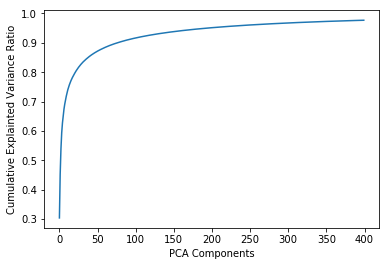

In [0]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("PCA Components")
plt.ylabel("Cumulative Explainted Variance Ratio")

In [0]:
np.cumsum(pca.explained_variance_ratio_)[100]

0.91671025539054884

Looks like we can get away with about 100 PCA components to explain close to 92% of the model's variance.

In [0]:
PCA_COMPONENTS = 100
pca=PCA(n_components=PCA_COMPONENTS)
Xtrain_pca = pca.fit_transform(Xtrain_split_reshape)
Xtest_pca = pca.transform(Xtest_split_reshape)

In [0]:
# lets revert the PCA'd images 
Xtrain_pca_invert = pca.inverse_transform(Xtrain_pca)
Xtrain_pca_invert = Xtrain_pca_invert*255
Xtrain_pca_invert = Xtrain_pca_invert.reshape(len(Xtrain_pca_invert), IMG_W, IMG_H, 1)

Let's take a look at what the images now look like after being transformed through PCA.

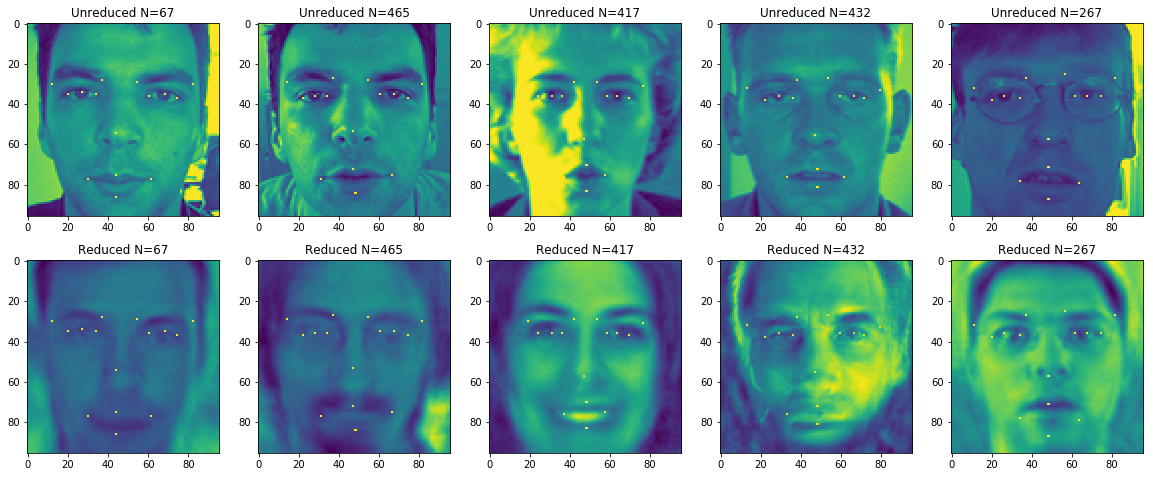

In [0]:
rows = 2
cols = 5

inds = np.random.choice(a=len(decoded_imgs), size=rows*cols, replace=False)
plt.subplots(figsize=(20,8),nrows=rows, ncols=cols)

for i in range(int(rows*cols/2)):
    plt.subplot(rows,cols,i+1)
    plt.title(('Unreduced N='+str(inds[i])))
    show_image_labels(Xtrain[inds[i]], Ytrain[inds[i]])
    
    plt.subplot(rows,cols,i+1+cols)
    plt.title(('Reduced N='+str(inds[i])))
    show_image_labels(Xtrain_pca_invert[inds[i]], Ytrain[inds[i]])

plt.show()

### Keras autoencoder

In [0]:
encoded_dim= 32
input_img = Input(shape=(9216,)) 
encoded = Dense(encoded_dim, activation='relu')(input_img)
decoded = Dense(9216, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoded_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [0]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
# This autoencoder fit should approximate PCA
autoencoder.fit(Xtrain_re, Xtrain_split_norm_reshape,
                epochs=5,
                validation_data=(Xtest_split_norm_reshape, Xtest_split_norm_reshape))

Train on 7049 samples, validate on 641 samples
Epoch 1/5
7049/7049 [==============================] - 3s 470us/step - loss: 0.6609 - val_loss: 0.6649
Epoch 2/5
7049/7049 [==============================] - 3s 455us/step - loss: 0.6564 - val_loss: 0.6609
Epoch 3/5
7049/7049 [==============================] - 3s 469us/step - loss: 0.6534 - val_loss: 0.6579
Epoch 4/5
7049/7049 [==============================] - 3s 471us/step - loss: 0.6510 - val_loss: 0.6553
Epoch 5/5
7049/7049 [==============================] - 3s 470us/step - loss: 0.6485 - val_loss: 0.6523


In [0]:
encoded_imgs = encoder.predict(Xtest_split_norm_reshape)
decoded_imgs = decoder.predict(encoded_imgs)

In [0]:
decoded_imgs_ = decoded_imgs.reshape(len(Xtest_split_norm), 96, 96, 1) 
np.max(decoded_imgs_)

0.93186891

In [0]:
Xtrain_split_norm_ = Xtrain_clean_norm_reshape.reshape((len(Xtrain_clean_norm), 96, 96, 1))
Xtest_split_norm_ = Xtest_split_norm_reshape.reshape((len(Xtest_split_norm), 96, 96, 1))

Xtrain_split_norm_.shape

(7049, 96, 96, 1)

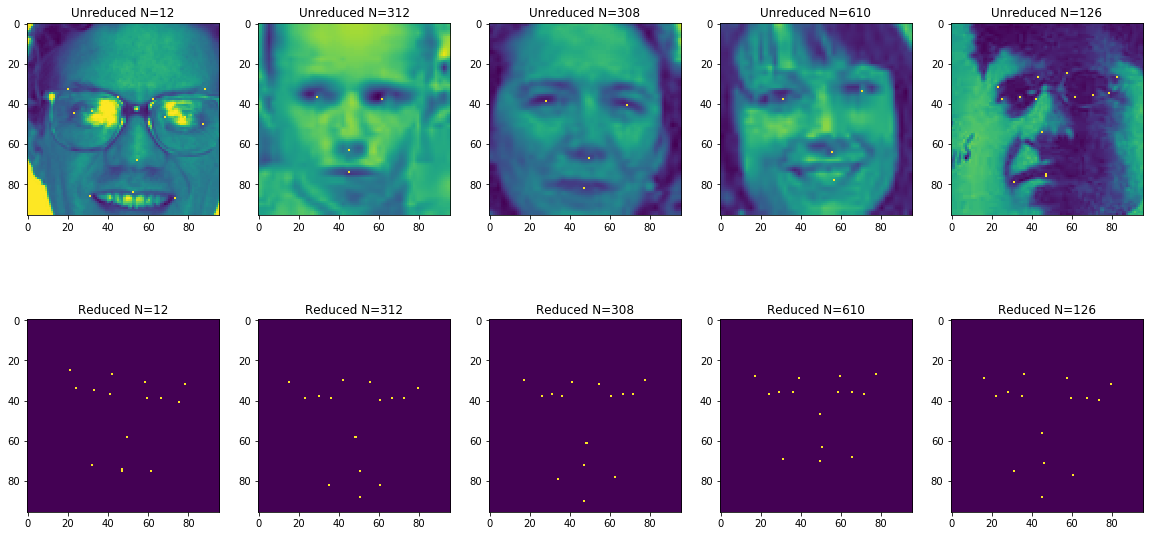

In [0]:
rows = 2
cols = 5

inds = np.random.choice(a=len(decoded_imgs), size=rows*cols, replace=False)
plt.subplots(figsize=(20,10),nrows=rows, ncols=cols)

for i in range(int(rows*cols/2)):
    plt.subplot(rows,cols,i+1)
    plt.title(('Unreduced N='+str(inds[i])))
    show_image_labels(na_train[inds[i]], na_label[inds[i]])
    
    plt.subplot(rows,cols,i+1+cols)
    plt.title(('Reduced N='+str(inds[i])))
    show_image_labels(decoded_imgs_[inds[i]], Ytest_split[inds[i]])

    
plt.show()

Now we try to change the activation function to test if we can get a better accuracy score

In [0]:
# Configure Model with activation of tanh
model2 = keras.Sequential([keras.layers.Flatten(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH,1)),
                         keras.layers.Dense(128, activation="tanh"),
                         keras.layers.Dropout(0.1),
                         keras.layers.Dense(64, activation="tanh"),
                         keras.layers.Dense(30)
                         ])
# Compile model
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='mse',
              metrics=['accuracy'])
# Train model
model.fit(Xtrain, Ytrain, epochs=10)

Change optimizer function to check if we can get a better result

In [0]:
# Configure Model with activation of relu and GD optimizer
model2 = keras.Sequential([keras.layers.Flatten(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH,1)),
                         keras.layers.Dense(128, activation="relu"),
                         keras.layers.Dropout(0.1),
                         keras.layers.Dense(64, activation="relu"),
                         keras.layers.Dense(30)
                         ])
# Compile model
model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=1), 
              loss='mse',
              metrics=['accuracy'])
# Train model
model.fit(Xtrain, Ytrain, epochs=10)

Usually with a higher dropout rate we can overcome the problem of overfitting and increase the accuracy score. Here we give it a try:

In [0]:
# Configure Model with activation of relu and higher dropout rate than base model
model2 = keras.Sequential([keras.layers.Flatten(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH,1)),
                         keras.layers.Dense(128, activation="relu"),
                         keras.layers.Dropout(0.2),
                         keras.layers.Dense(64, activation="relu"),
                         keras.layers.Dense(30)
                         ])
# Compile model
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='mse',
              metrics=['accuracy'])
# Train model
model.fit(Xtrain, Ytrain, epochs=10)